In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import pearsonr

In [3]:
# Load your dataset
Weather_data = pd.read_csv('/content/drive/MyDrive/Dataset_Weather Forecast.csv')

In [4]:
Weather_data = Weather_data.loc[:,['T2M_MAX', 'T2M_MIN', 'TS','T2M','PRECTOTCORR','QV2M','RH2M','WS10M_RANGE','WD10M','CLRSKY_SFC_SW_DWN','CLRSKY_SFC_PAR_TOT','T2MDEW']]
Weather_data = Weather_data.rename(index=str, columns={'T2M_MAX': 'Temp_Max', 'T2M_MIN': 'Temp_Min', 'TS': 'Skin_Temp', 'T2M': 'Temp_2Meter',
                                                       'PRECTOTCORR': 'Percipitation','QV2M':'Specific_Humiduty','RH2M':'Relative_Humidity','WS10M_RANGE':'Wind_Speed',
                                                       'WD10M':'Wind_Direction','CLRSKY_SFC_SW_DWN':'Sky_Shortwave_Downward','CLRSKY_SFC_PAR_TOT':'Sky_Par_Total',
                                                       'T2MDEW':'Frost_point'})
print(f'dataset shape (rows, columns) - {Weather_data.shape}')
Weather_data.head()

dataset shape (rows, columns) - (4018, 12)


Temp_Max  Temp_Min  Skin_Temp  Temp_2Meter  Percipitation  \
0      0.71     -4.86      -2.52        -2.15           0.28   
1      1.78     -2.30      -0.73        -0.47           1.57   
2      0.80     -5.05      -3.70        -2.95           0.04   
3      0.21     -5.06      -3.81        -3.44           0.07   
4      0.15     -3.00      -1.52        -1.35           8.50   

   Specific_Humiduty  Relative_Humidity  Wind_Speed  Wind_Direction  \
0               3.11              96.19        2.41          208.50   
1               3.54              97.06        2.24          256.75   
2               2.87              96.69        3.06           44.19   
3               2.81              97.31        2.11          294.94   
4               3.36              97.06        4.87          146.75   

   Sky_Shortwave_Downward  Sky_Par_Total  Frost_point  
0                    3.94          18.31        -2.89  
1                    3.76          17.61        -0.95  
2                    3.96          18.31        -3.57  
3                    4.09          19.59        -4.06  
4                    3.85          18.50        -1.89

In [5]:
Weather_data.apply(pd.isnull).sum()/Weather_data.shape[0]

Temp_Max                  0.0
Temp_Min                  0.0
Skin_Temp                 0.0
Temp_2Meter               0.0
Percipitation             0.0
Specific_Humiduty         0.0
Relative_Humidity         0.0
Wind_Speed                0.0
Wind_Direction            0.0
Sky_Shortwave_Downward    0.0
Sky_Par_Total             0.0
Frost_point               0.0
dtype: float64

In [6]:
Weather_data.dtypes

Temp_Max                  float64
Temp_Min                  float64
Skin_Temp                 float64
Temp_2Meter               float64
Percipitation             float64
Specific_Humiduty         float64
Relative_Humidity         float64
Wind_Speed                float64
Wind_Direction            float64
Sky_Shortwave_Downward    float64
Sky_Par_Total             float64
Frost_point               float64
dtype: object

In [7]:
# Assuming the data is daily starting from an arbitrary date
start_date = '2010-01-01'
date_range = pd.date_range(start=start_date, periods=len(Weather_data), freq='D')
Weather_data['Date'] = date_range
Weather_data.set_index('Date', inplace=True)

In [8]:
# Set the frequency explicitly
Weather_data.index = pd.date_range(start=start_date, periods=len(Weather_data), freq='D')

In [9]:
Weather_data.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=4018, freq='D')

In [10]:
# Get summary statistics
print(Weather_data.describe())

          Temp_Max     Temp_Min    Skin_Temp  Temp_2Meter  Percipitation  \
count  4018.000000  4018.000000  4018.000000  4018.000000    4018.000000   
mean     13.524333     5.632989     9.441834     9.496451       2.085401   
std       6.116137     4.679116     5.587894     5.378431       3.424648   
min      -2.260000    -9.310000    -6.350000    -5.350000       0.000000   
25%       8.802500     2.092500     5.282500     5.542500       0.140000   
50%      13.560000     5.760000     9.395000     9.455000       0.650000   
75%      18.440000     9.300000    14.080000    13.940000       2.457500   
max      31.970000    17.670000    23.490000    23.830000      31.920000   

       Specific_Humiduty  Relative_Humidity   Wind_Speed  Wind_Direction  \
count        4018.000000        4018.000000  4018.000000     4018.000000   
mean            6.614507          86.532695     3.916951      202.704564   
std             2.048645           7.389994     1.947824       76.181344   
min        

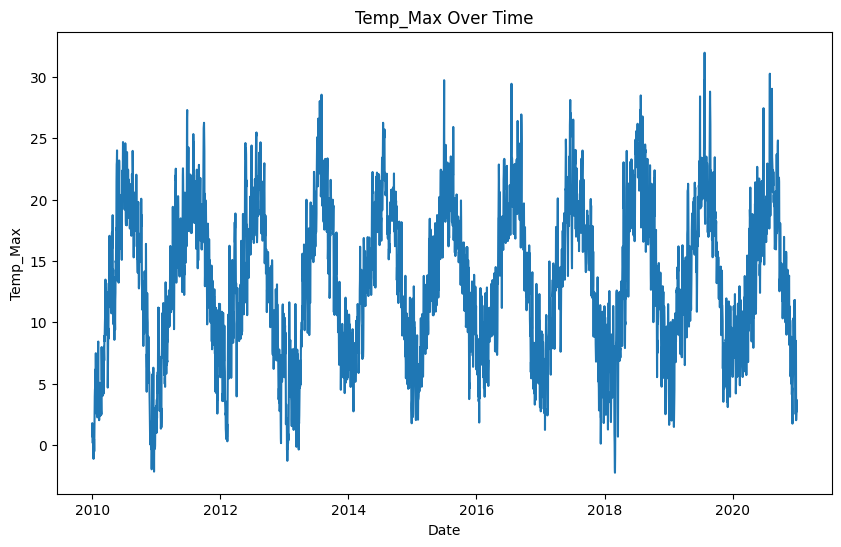

In [11]:
# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(Weather_data['Temp_Max'])
plt.title('Temp_Max Over Time')
plt.xlabel('Date')
plt.ylabel('Temp_Max')
plt.show()

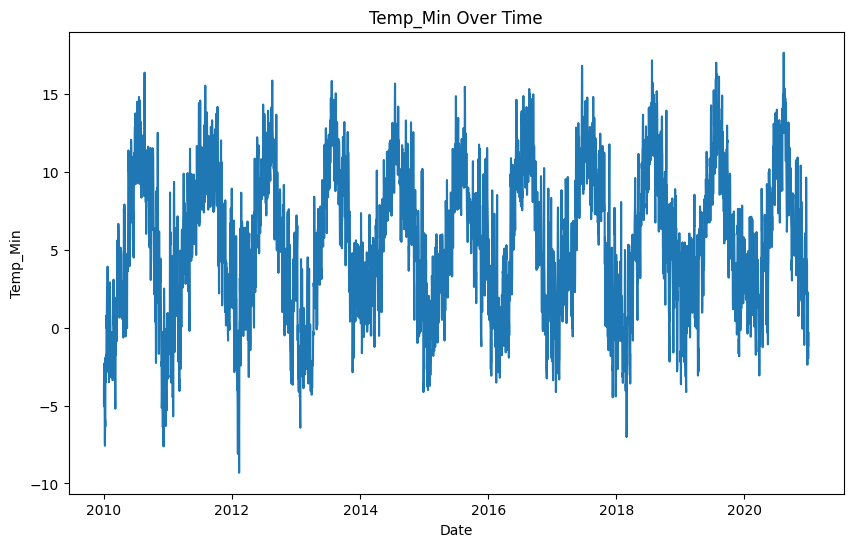

In [12]:
# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(Weather_data['Temp_Min'])
plt.title('Temp_Min Over Time')
plt.xlabel('Date')
plt.ylabel('Temp_Min')
plt.show()

Temp_Max                  0
Temp_Min                  0
Skin_Temp                 0
Temp_2Meter               0
Percipitation             0
Specific_Humiduty         0
Relative_Humidity         0
Wind_Speed                0
Wind_Direction            0
Sky_Shortwave_Downward    0
Sky_Par_Total             0
Frost_point               0
dtype: int64


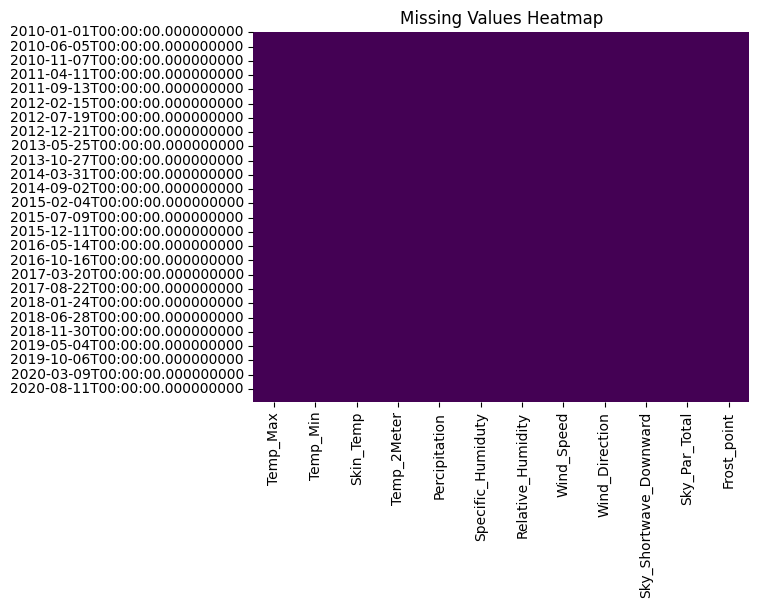

In [13]:
# Check for missing values
print(Weather_data.isnull().sum())

# Visualize missing values
sns.heatmap(Weather_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

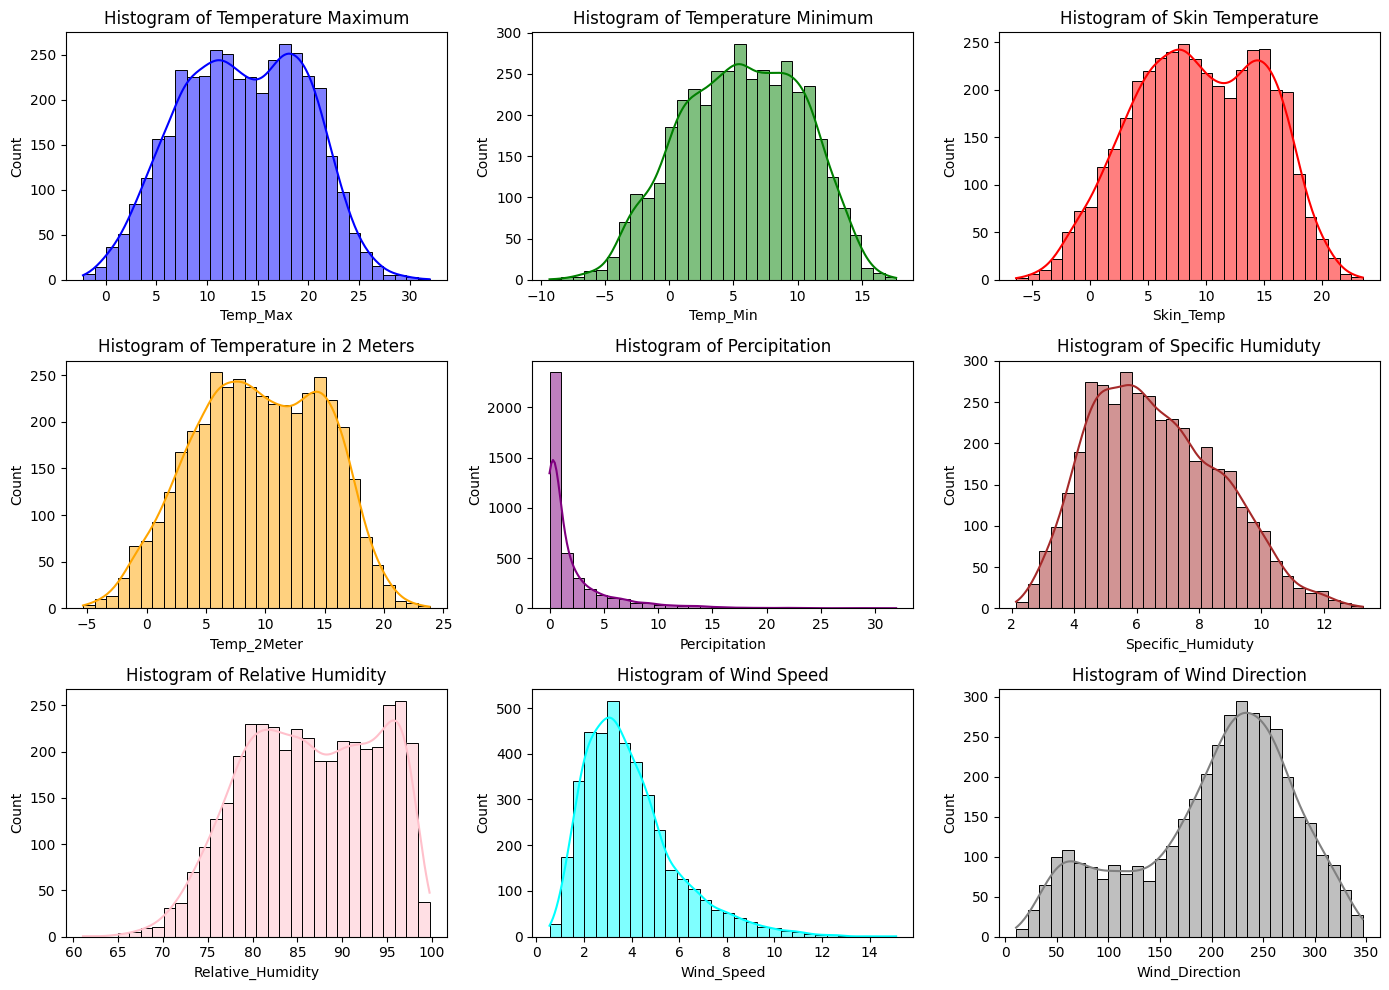

In [14]:
# Plot histograms for all numerical attributes
plt.figure(figsize=(14, 10))

plt.subplot(3, 3, 1)
sns.histplot(Weather_data['Temp_Max'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Histogram of Temperature Maximum')

plt.subplot(3, 3, 2)
sns.histplot(Weather_data['Temp_Min'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Histogram of Temperature Minimum')

plt.subplot(3, 3, 3)
sns.histplot(Weather_data['Skin_Temp'], bins=30, kde=True, color='red', edgecolor='black')
plt.title('Histogram of Skin Temperature')

plt.subplot(3, 3, 4)
sns.histplot(Weather_data['Temp_2Meter'], bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Histogram of Temperature in 2 Meters')

plt.subplot(3, 3, 5)
sns.histplot(Weather_data['Percipitation'], bins=30, kde=True, color='purple', edgecolor='black')
plt.title('Histogram of Percipitation')

plt.subplot(3, 3, 6)
sns.histplot(Weather_data['Specific_Humiduty'], bins=30, kde=True, color='brown', edgecolor='black')
plt.title('Histogram of Specific Humiduty')

plt.subplot(3, 3, 7)
sns.histplot(Weather_data['Relative_Humidity'], bins=30, kde=True, color='pink', edgecolor='black')
plt.title('Histogram of Relative Humidity')

plt.subplot(3, 3, 8)
sns.histplot(Weather_data['Wind_Speed'], bins=30, kde=True, color='cyan', edgecolor='black')
plt.title('Histogram of Wind Speed')

plt.subplot(3, 3, 9)
sns.histplot(Weather_data['Wind_Direction'], bins=30, kde=True, color='gray', edgecolor='black')
plt.title('Histogram of Wind Direction')

plt.tight_layout()
plt.show()

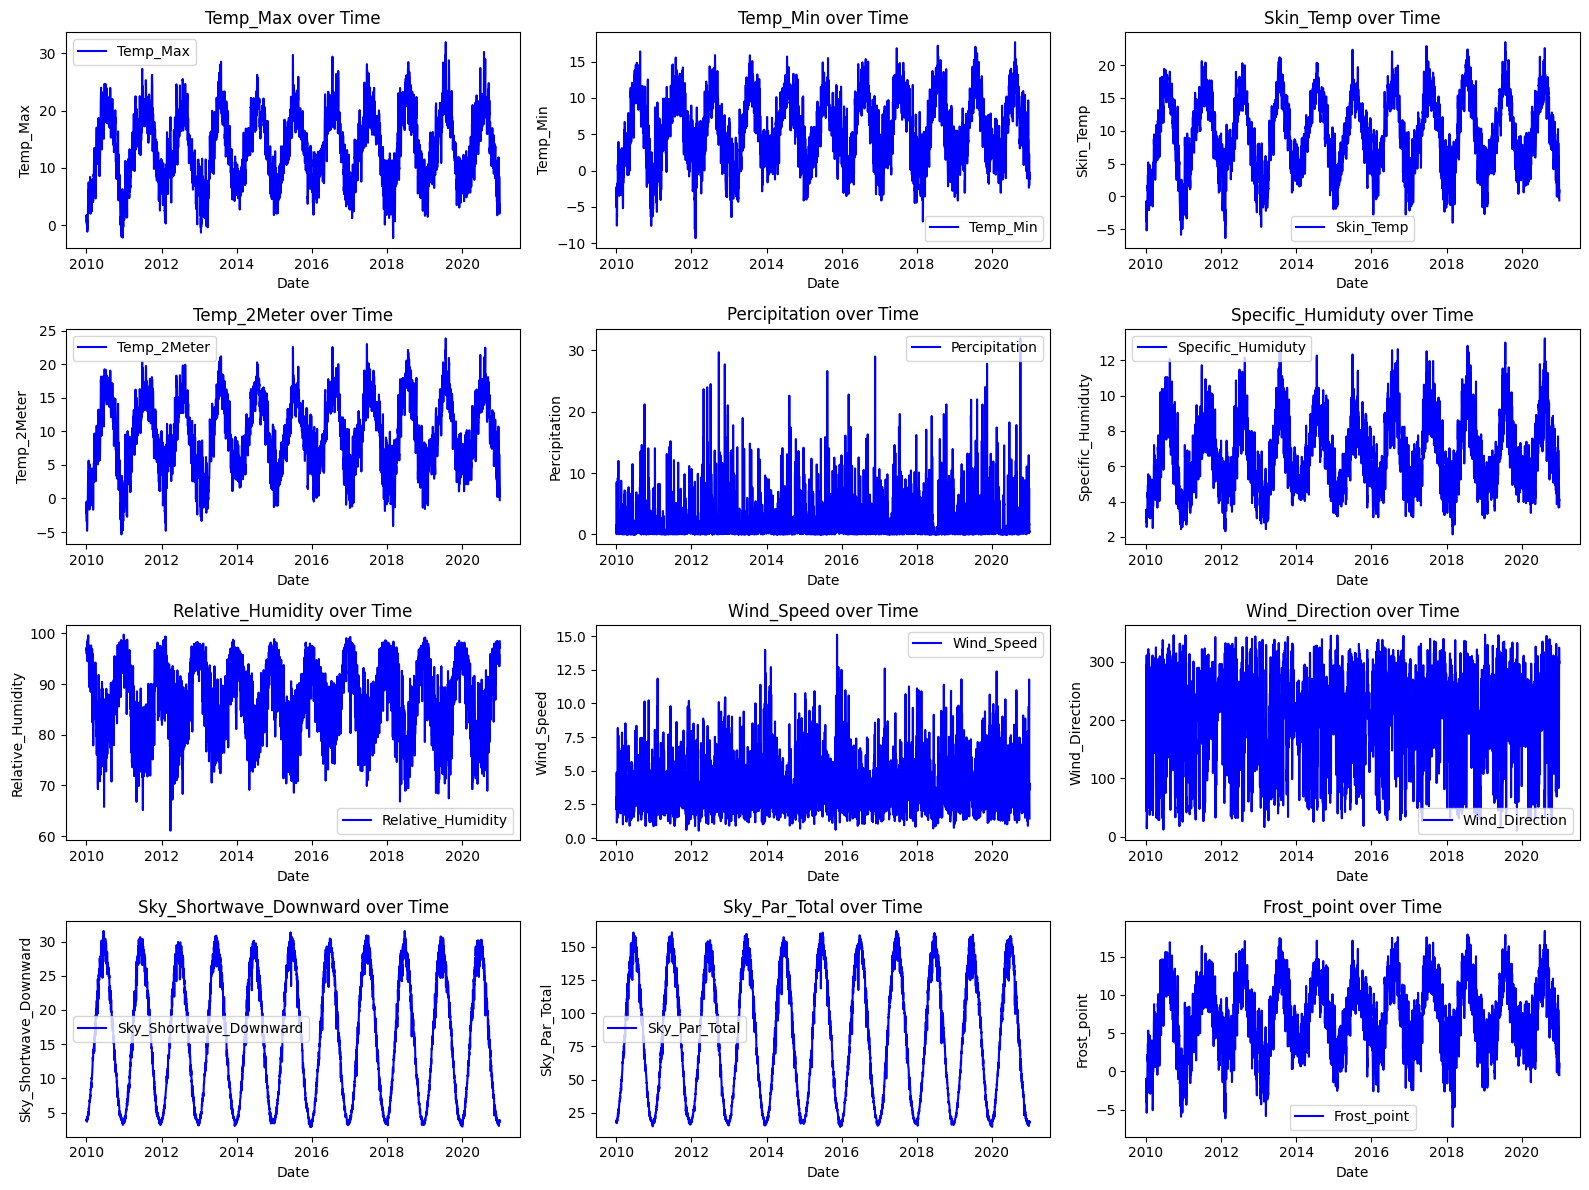

In [15]:
numerical_cols = ["Temp_Max","Temp_Min","Skin_Temp","Temp_2Meter","Percipitation","Specific_Humiduty","Relative_Humidity","Wind_Speed","Wind_Direction","Sky_Shortwave_Downward", "Sky_Par_Total","Frost_point"]

# Plotting all attributes
plt.figure(figsize=(16, 12))

# Determine number of rows for subplots
n_rows = (len(numerical_cols) // 3) + int(len(numerical_cols) % 3 > 0)

for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(n_rows, 3, i)
    plt.plot(Weather_data.index, Weather_data[col], label=col, color='b')  # 'b' stands for blue; change color if needed
    plt.title(f'{col} over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()

plt.tight_layout()
plt.show()


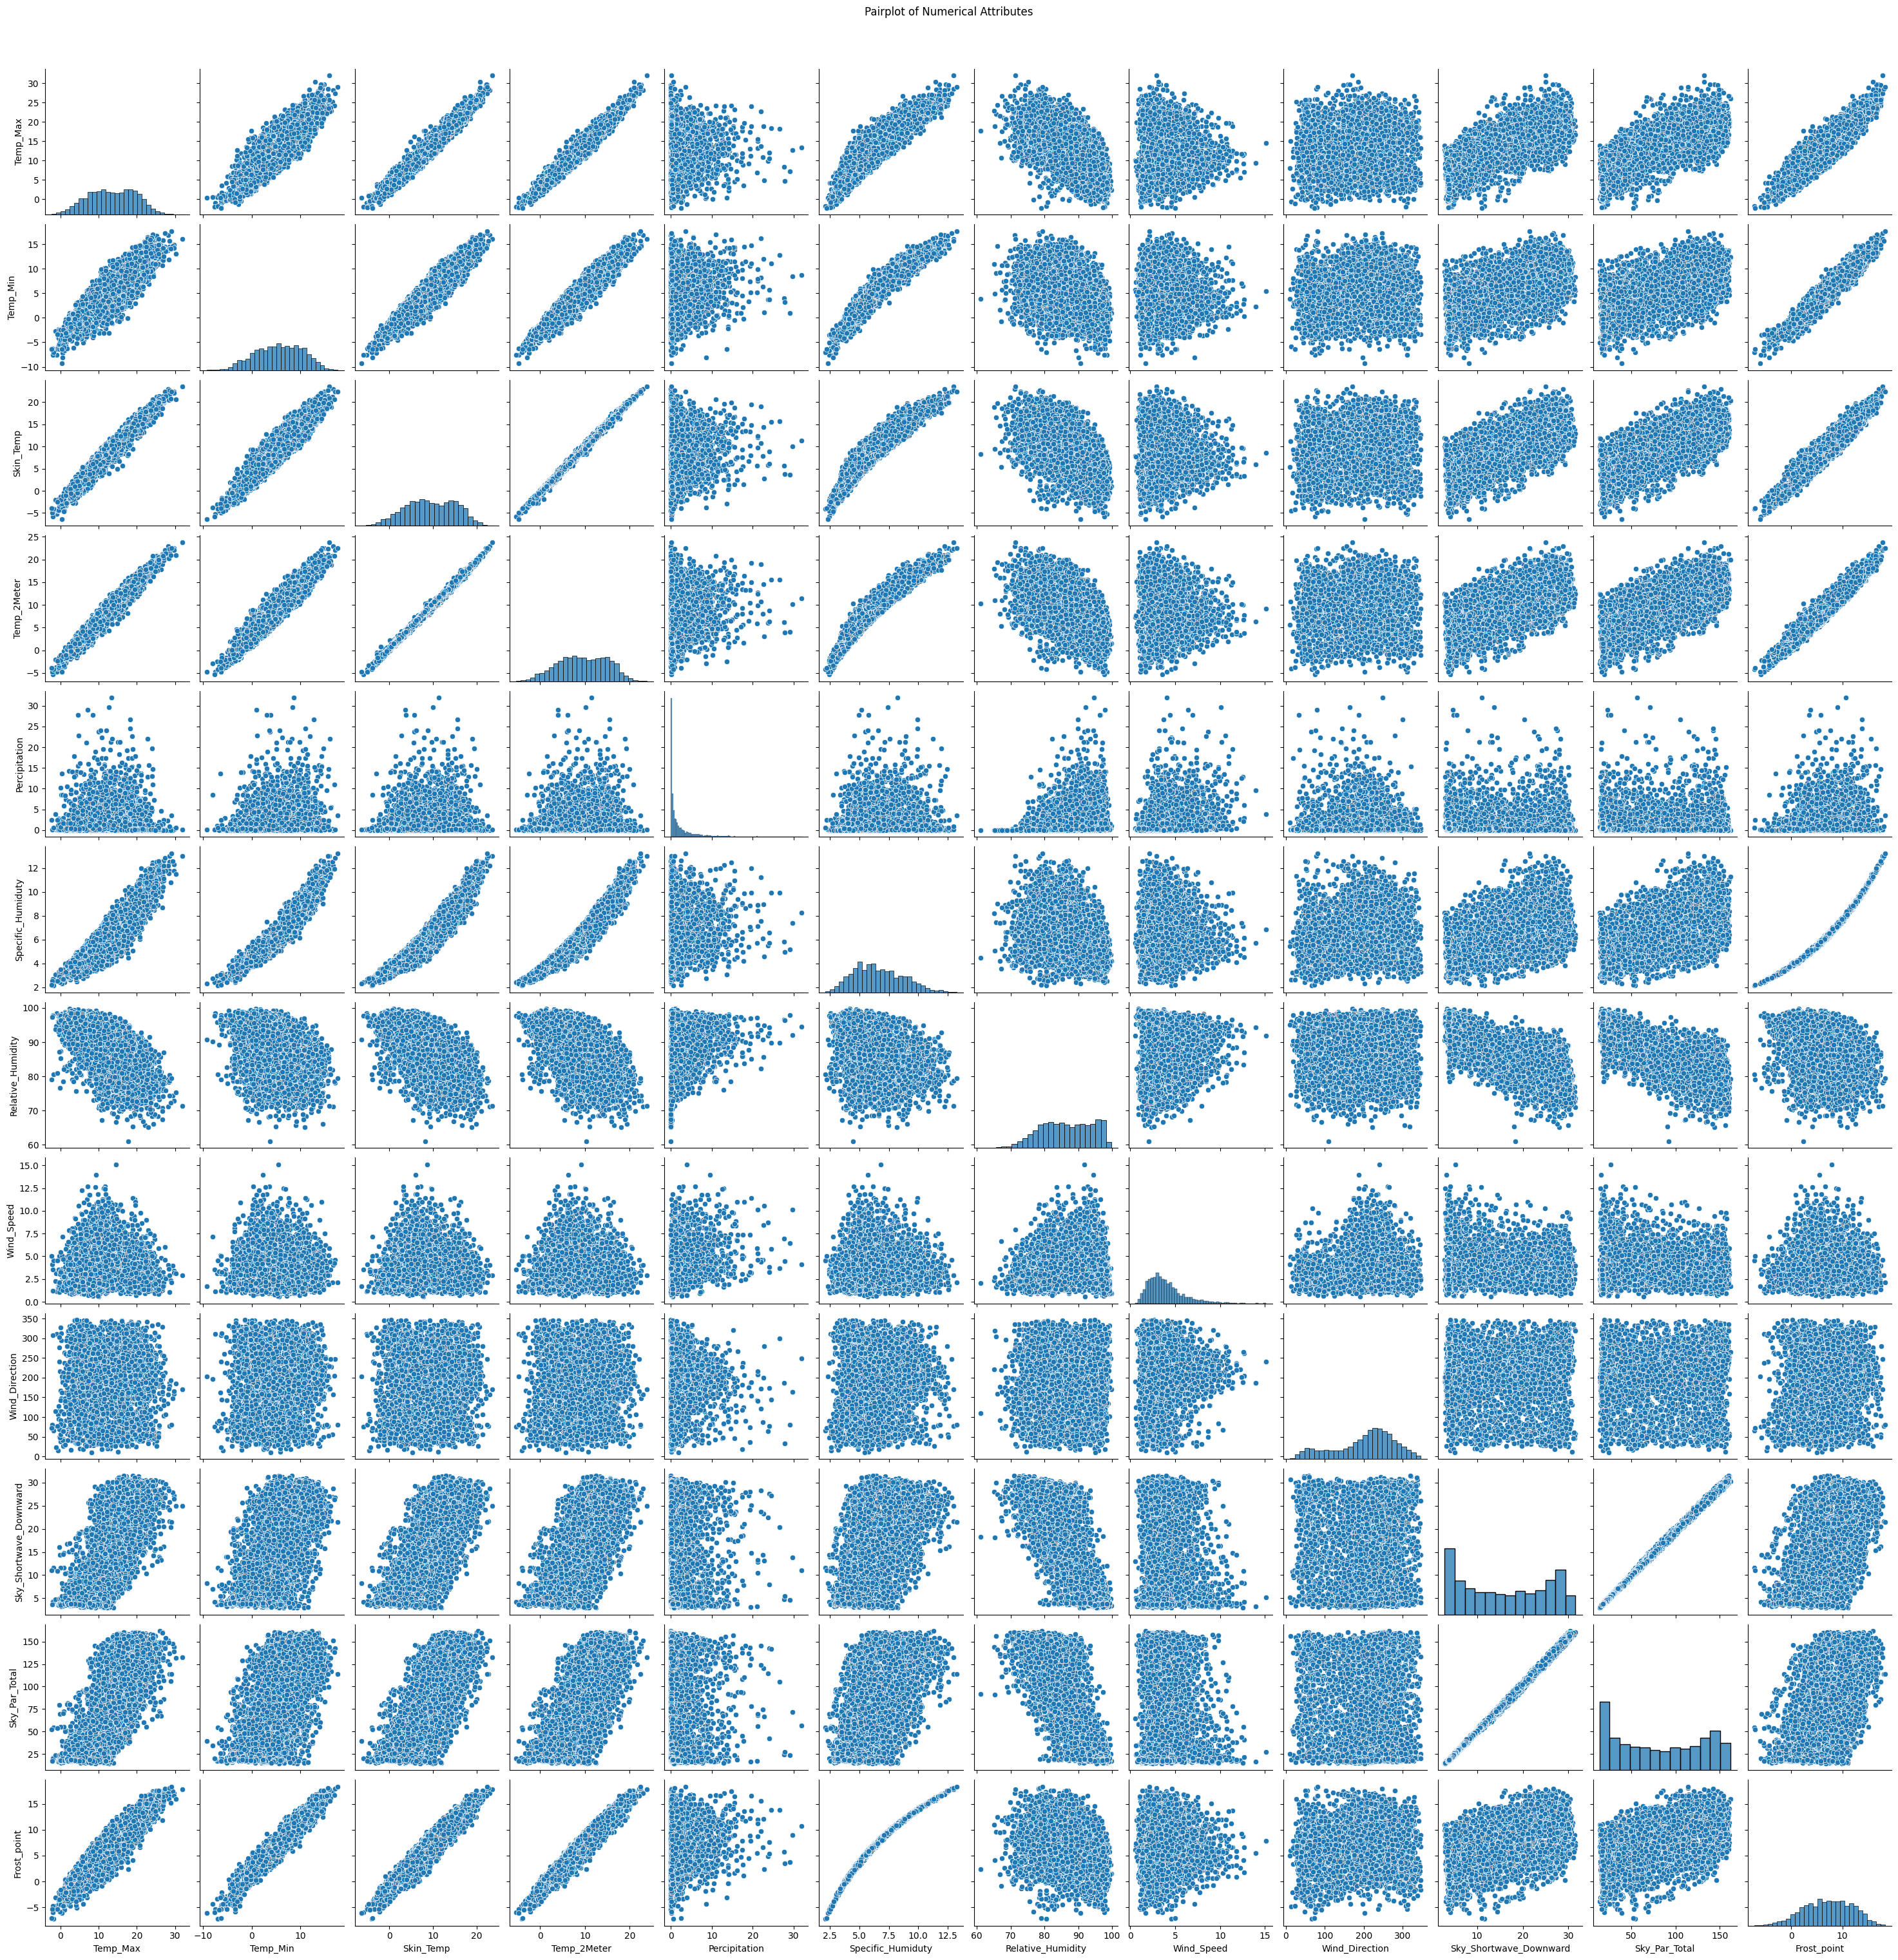

In [16]:
# Pairplot for numerical attributes
sns.pairplot(Weather_data[["Temp_Max","Temp_Min","Skin_Temp","Temp_2Meter","Percipitation","Specific_Humiduty","Relative_Humidity","Wind_Speed","Wind_Direction","Sky_Shortwave_Downward", "Sky_Par_Total","Frost_point"]])
plt.suptitle('Pairplot of Numerical Attributes', y=1.02)
plt.show()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

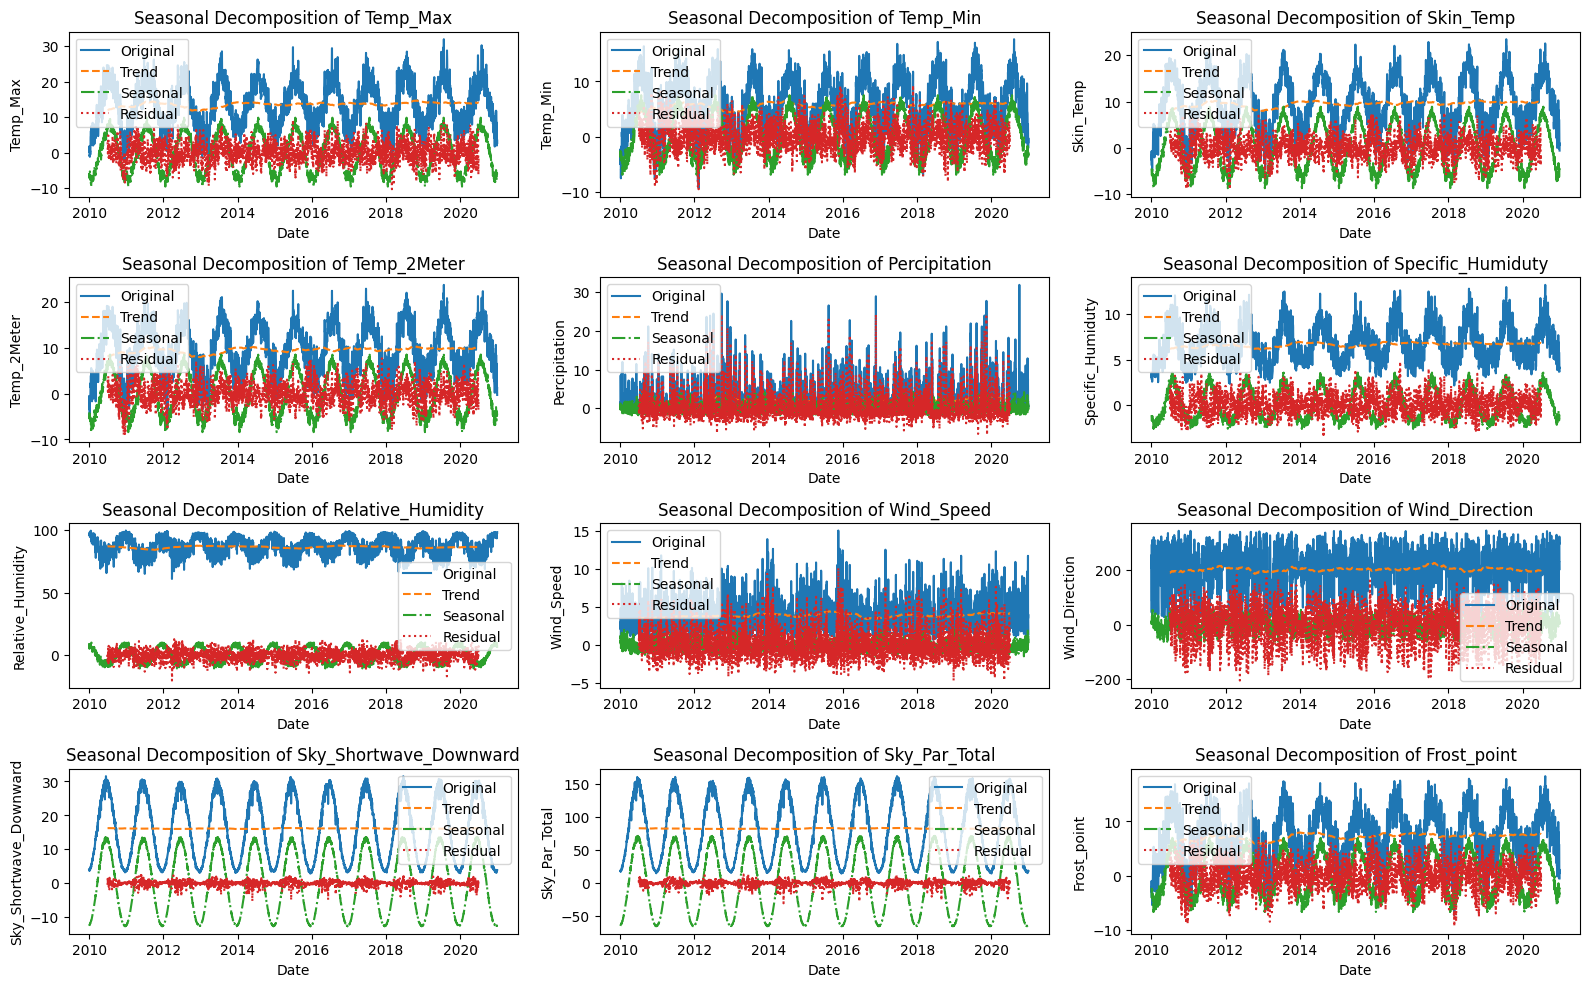

In [18]:
#Weather_data['Date'] = pd.to_datetime(Weather_data['YEAR'].astype(str) + Weather_data['DOY'].astype(str), format='%Y%j')
#Weather_data.set_index()

# List of all columns (excluding 'YEAR' and 'DOY')
all_columns = Weather_data.columns.tolist()

# Extract numerical columns for decomposing time series
numerical_cols = [col for col in all_columns]

# Decompose and plot components for each attribute
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, start=1):
    decomposition = seasonal_decompose(Weather_data[col], model='additive', period=365)  # Adjust period if known
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    plt.plot(Weather_data.index, Weather_data[col], label='Original')
    plt.plot(Weather_data.index, trend, label='Trend', linestyle='--')
    plt.plot(Weather_data.index, seasonal, label='Seasonal', linestyle='-.')
    plt.plot(Weather_data.index, residual, label='Residual', linestyle=':')
    plt.title(f'Seasonal Decomposition of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()

plt.show()

In [19]:
from pandas.plotting import autocorrelation_plot

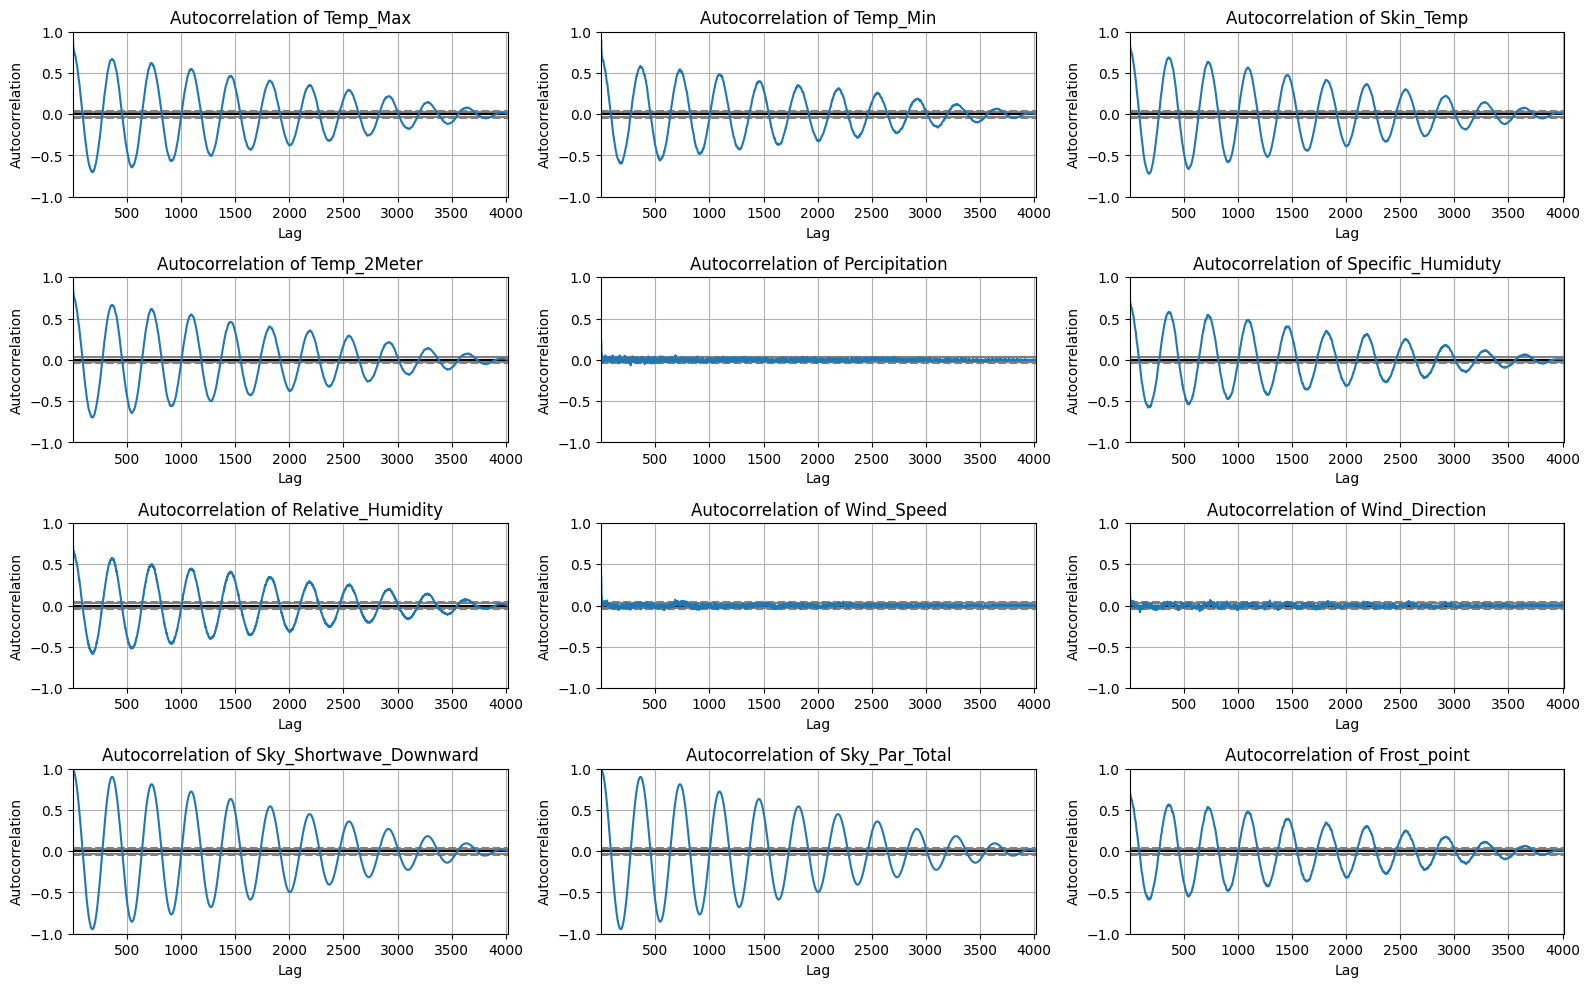

In [20]:
# List of all columns (excluding 'YEAR' and 'DOY')
all_columns = Weather_data.columns.tolist()

# Extract numerical columns for autocorrelation
numerical_cols = [col for col in all_columns]

# Plot autocorrelation for each attribute
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    autocorrelation_plot(Weather_data[col])
    plt.title(f'Autocorrelation of {col}')
    plt.tight_layout()

plt.show()

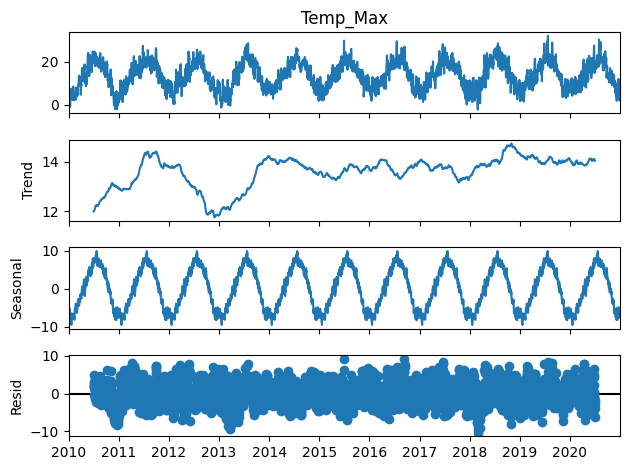

ADF Statistic: -3.7274863091412183
p-value: 0.003742732107176859
Critical Value 1%: -3.431987924087406
Critical Value 5%: -2.862263745264969
Critical Value 10%: -2.56715525735392


In [21]:
# Decomposing the time series for one parameter (e.g., Temp_Max)
result = seasonal_decompose(Weather_data['Temp_Max'], model='additive', period=365)  # Assuming daily data with yearly seasonality
result.plot()
plt.show()

# Perform Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(Weather_data['Temp_Max'].dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
for key, value in adf_result[4].items():
    print(f'Critical Value {key}: {value}')

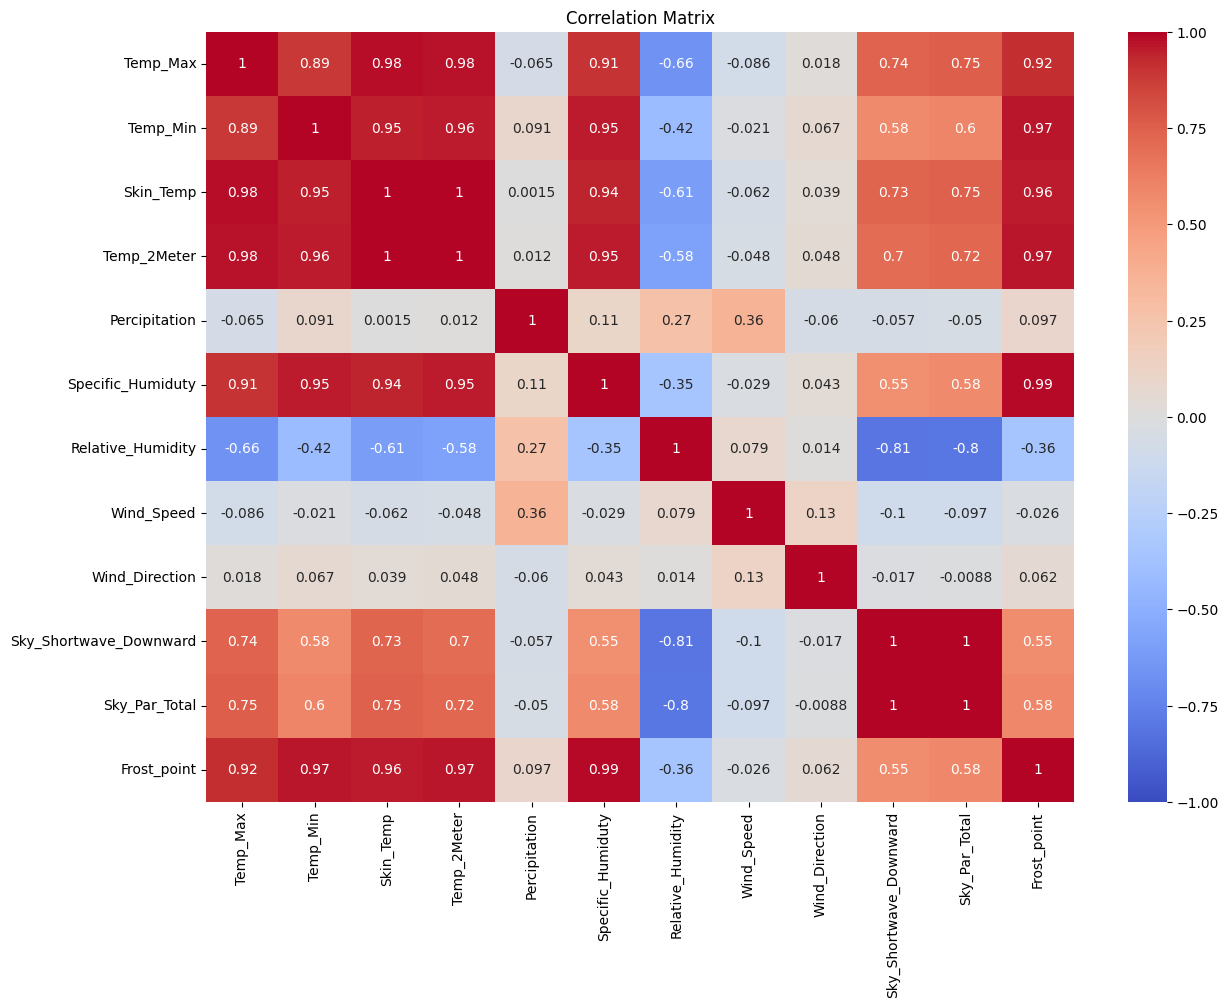

In [22]:
# Correlation matrix for all numerical variables
corr_matrix = Weather_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
Weather_data_Prep = Weather_data.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
#Weather_data.index = pd.to_datetime(Weather_data.index)

# Remove infinity values and large numbers
#Weather_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Handling Missing Values
imputer = SimpleImputer(strategy='mean')
weather_data_imputed = pd.DataFrame(imputer.fit_transform(Weather_data_Prep), columns=Weather_data_Prep.columns, index=Weather_data_Prep.index)

In [ ]:
# Scaling and Normalization
scaler = StandardScaler()
weather_data_scaled = pd.DataFrame(scaler.fit_transform(weather_data_imputed), columns=weather_data_imputed.columns, index=weather_data_imputed.index)

In [ ]:
# Feature Engineering
weather_data_scaled['monthly_avg'] = weather_data_scaled['Temp_Max'].rolling(window=30).mean()
weather_data_scaled['day_of_year_avg'] = weather_data_scaled.groupby(weather_data_scaled.index.dayofyear)['Temp_Max'].transform(lambda x: x.expanding().mean())
weather_data_scaled['max_min_ratio'] = weather_data_scaled['Temp_Max'] / weather_data_scaled['Temp_Min']

In [ ]:
# Dropping initial rows with NaN values due to rolling mean
weather_data_scaled = weather_data_scaled.dropna()

In [ ]:
# Ensure all columns are numeric for outlier detection
weather_data_scaled = weather_data_scaled.apply(pd.to_numeric, errors='coerce')

# Check for any non-numeric columns and convert them
for col in weather_data_scaled.columns:
    if not np.issubdtype(weather_data_scaled[col].dtype, np.number):
        weather_data_scaled[col] = pd.to_numeric(weather_data_scaled[col], errors='coerce')

# Outlier Detection and Treatment (using IQR method)
Q1 = weather_data_scaled.quantile(0.25)
Q3 = weather_data_scaled.quantile(0.75)
IQR = Q3 - Q1
weather_data_no_outliers = weather_data_scaled[~((weather_data_scaled < (Q1 - 1.5 * IQR)) | (weather_data_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]

# Final transformed data
final_weather_data = weather_data_no_outliers.copy()

In [ ]:
final_weather_data.head()

Temp_Max  Temp_Min  Skin_Temp  Temp_2Meter  Percipitation  \
Date                                                                    
2010-01-30 -1.843604 -1.949967  -2.062185    -2.072693      -0.600253   
2010-01-31 -1.840334 -1.834547  -1.886784    -1.890461      -0.425031   
2010-02-01 -1.545994 -1.714851  -1.729281    -1.715668      -0.498040   
2010-02-02 -1.058697 -1.244618  -1.190549    -1.139219       0.535771   
2010-02-03 -1.410270 -1.563094  -1.539561    -1.520419       0.138601   

            Specific_Humiduty  Relative_Humidity  Wind_Speed  Wind_Direction  \
Date                                                                           
2010-01-30          -1.710859           0.791345   -0.681333        1.440630   
2010-01-31          -1.471647           1.424712   -0.907254        1.086168   
2010-02-01          -1.471647           0.917206   -0.506757        1.084461   
2010-02-02          -0.905349           1.390879    1.321150        0.880974   
2010-02-03          -1.291017           0.859012    0.217217        0.235198   

            Sky_Shortwave_Downward  Sky_Par_Total  Frost_point  monthly_avg  \
Date                                                                          
2010-01-30               -1.037126      -1.059706    -2.145135    -1.816460   
2010-01-31               -1.029492      -1.039626    -1.756799    -1.807956   
2010-02-01               -1.007680      -1.021429    -1.711493    -1.795474   
2010-02-02               -1.036036      -1.022475    -0.917562    -1.761407   
2010-02-03               -1.022948      -1.022475    -1.493594    -1.735843   

            day_of_year_avg  max_min_ratio  
Date                                        
2010-01-30        -1.843604       0.945454  
2010-01-31        -1.840334       1.003155  
2010-02-01        -1.545994       0.901532  
2010-02-02        -1.058697       0.850620  
2010-02-03        -1.410270       0.902230

In [ ]:
# Define predictors and target
predictors_f = ["Temp_Max","Temp_Min","Skin_Temp","Temp_2Meter","Percipitation","Specific_Humiduty",
              "Relative_Humidity","Wind_Speed","Wind_Direction","Sky_Shortwave_Downward",
              "Sky_Par_Total","Frost_point","monthly_avg","day_of_year_avg","max_min_ratio"]
target_f = 'Temp_Max'

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [ ]:
# Split data into train and test sets
train_data = weather_data_scaled.loc[:"2019-12-30"]
test_data = weather_data_scaled.loc["2020-01-01":]

# Check for any remaining NaN values in the training data
assert train_data[predictors_f].isnull().sum().sum() == 0, "There are still missing values in the predictors"
assert train_data[target_f].isnull().sum() == 0, "There are still missing values in the target"

# Define the model for feature selection
ridge_reg = Ridge(alpha=0.1)


# Define the model for feature selection
ridge_reg = Ridge(alpha=0.1)

In [ ]:
# 1. Correlation Analysis
correlation_matrix = train_data[predictors_f + [target_f]].corr()
print("Correlation matrix:\n", correlation_matrix[target_f])

# 2. Recursive Feature Elimination (RFE)
rfe = RFE(ridge_reg, n_features_to_select=10)
rfe.fit(train_data[predictors_f], train_data[target_f])
print("Selected features by RFE:", train_data[predictors_f].columns[rfe.support_])

# 3. Feature Importance from RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_data[predictors_f], train_data[target_f])
importances = forest_reg.feature_importances_
indices = np.argsort(importances)[::-1]

Correlation matrix:
                         Temp_Max  Temp_Max
Temp_Max                1.000000  1.000000
Temp_Min                0.889990  0.889990
Skin_Temp               0.978029  0.978029
Temp_2Meter             0.976926  0.976926
Percipitation          -0.065045 -0.065045
Specific_Humiduty       0.907238  0.907238
Relative_Humidity      -0.653996 -0.653996
Wind_Speed             -0.079104 -0.079104
Wind_Direction          0.027745  0.027745
Sky_Shortwave_Downward  0.734013  0.734013
Sky_Par_Total           0.750066  0.750066
Frost_point             0.917605  0.917605
monthly_avg             0.863763  0.863763
day_of_year_avg         0.911432  0.911432
max_min_ratio          -0.008868 -0.008868
Temp_Max                1.000000  1.000000
Selected features by RFE: Index(['Temp_Max', 'Temp_Min', 'Skin_Temp', 'Temp_2Meter', 'Specific_Humiduty',
       'Relative_Humidity', 'Sky_Shortwave_Downward', 'Sky_Par_Total',
       'Frost_point', 'day_of_year_avg'],
      dtype='object')


In [ ]:
print("Feature ranking:")
for f in range(len(predictors_f)):
    print(f"{f + 1}. {train_data[predictors_f].columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. Temp_Max (0.9998951444754391)
2. Temp_2Meter (2.678333184496233e-05)
3. Skin_Temp (1.4437472096159876e-05)
4. Relative_Humidity (1.1696693544418926e-05)
5. Specific_Humiduty (1.1438073844309751e-05)
6. day_of_year_avg (1.0513561742547076e-05)
7. Frost_point (9.748992921828444e-06)
8. Temp_Min (3.697415352174606e-06)
9. Wind_Direction (3.3891830991361066e-06)
10. max_min_ratio (3.183659254493441e-06)
11. Wind_Speed (2.7638857102501843e-06)
12. monthly_avg (2.190097987037797e-06)
13. Sky_Par_Total (1.7162333599559283e-06)
14. Sky_Shortwave_Downward (1.6933120766907547e-06)
15. Percipitation (1.6036117268879033e-06)


In [ ]:
# Final selected features (can be adjusted based on the above analysis)
selected_features = train_data[predictors_f].columns[rfe.support_]

<Axes: xlabel='Date'>

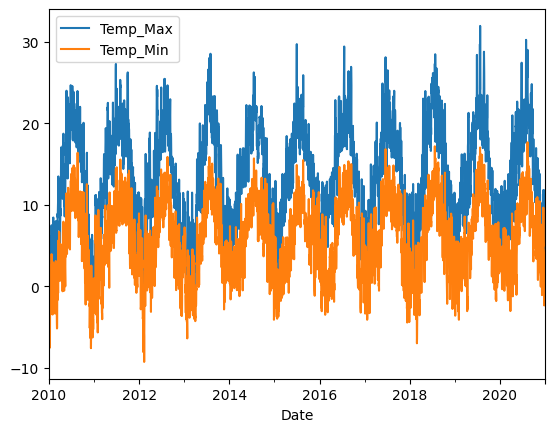

In [ ]:
Weather_data[["Temp_Max","Temp_Min"]].plot()

In [ ]:
Weather_data["target"] = Weather_data.shift(-1)["Temp_Max"]

In [ ]:
#Weather_data

In [ ]:
Weather_data = Weather_data.iloc[:-1,:].copy()

In [ ]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [ ]:
predictors = ["Temp_Max","Temp_Min","Skin_Temp",	"Temp_2Meter",	"Percipitation",	"Specific_Humiduty",	"Relative_Humidity",	"Wind_Speed",	"Wind_Direction", "Sky_Shortwave_Downward",	"Sky_Par_Total","Frost_point"]

In [ ]:
Train_data = Weather_data.loc[:'2019-12-30']

In [ ]:
Train_data.head(5)

Temp_Max  Temp_Min  Skin_Temp  Temp_2Meter  Percipitation  \
2010-01-01      0.71     -4.86      -2.52        -2.15           0.28   
2010-01-02      1.78     -2.30      -0.73        -0.47           1.57   
2010-01-03      0.80     -5.05      -3.70        -2.95           0.04   
2010-01-04      0.21     -5.06      -3.81        -3.44           0.07   
2010-01-05      0.15     -3.00      -1.52        -1.35           8.50   

            Specific_Humiduty  Relative_Humidity  Wind_Speed  Wind_Direction  \
2010-01-01               3.11              96.19        2.41          208.50   
2010-01-02               3.54              97.06        2.24          256.75   
2010-01-03               2.87              96.69        3.06           44.19   
2010-01-04               2.81              97.31        2.11          294.94   
2010-01-05               3.36              97.06        4.87          146.75   

            Sky_Shortwave_Downward  Sky_Par_Total  Frost_point  target  
2010-01-01                    3.94          18.31        -2.89    1.78  
2010-01-02                    3.76          17.61        -0.95    0.80  
2010-01-03                    3.96          18.31        -3.57    0.21  
2010-01-04                    4.09          19.59        -4.06    0.15  
2010-01-05                    3.85          18.50        -1.89    0.58

In [ ]:
Test_data = Weather_data.loc['2020-01-01':]

In [ ]:
Test_data.head(5)

Temp_Max  Temp_Min  Skin_Temp  Temp_2Meter  Percipitation  \
2020-01-01      5.55      3.33       4.57         4.76           0.30   
2020-01-02      9.15      5.69       7.04         7.41           0.69   
2020-01-03      9.12      2.22       4.94         5.52           1.20   
2020-01-04      7.47      2.81       4.52         5.00           0.09   
2020-01-05      8.37      4.78       5.83         6.13           0.13   

            Specific_Humiduty  Relative_Humidity  Wind_Speed  Wind_Direction  \
2020-01-01               5.13              96.56        4.59          182.00   
2020-01-02               6.10              95.38        3.52          201.56   
2020-01-03               5.25              92.88        3.14          279.75   
2020-01-04               5.07              94.94        2.91          265.94   
2020-01-05               5.62              96.50        3.03          225.56   

            Sky_Shortwave_Downward  Sky_Par_Total  Frost_point  target  
2020-01-01                    3.57          17.40         4.30    9.15  
2020-01-02                    2.95          14.40         6.73    9.12  
2020-01-03                    3.88          18.93         4.46    7.47  
2020-01-04                    3.93          19.38         4.27    8.37  
2020-01-05                    4.04          19.91         5.63    8.39

In [ ]:
reg.fit(Train_data[predictors], Train_data['target'])

Ridge(alpha=0.1)

In [ ]:
predictors

['Temp_Max',
 'Temp_Min',
 'Skin_Temp',
 'Temp_2Meter',
 'Percipitation',
 'Specific_Humiduty',
 'Relative_Humidity',
 'Wind_Speed',
 'Wind_Direction',
 'Sky_Shortwave_Downward',
 'Sky_Par_Total',
 'Frost_point']

In [ ]:
predictions = reg.predict(Test_data[predictors])

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(Test_data['target'],predictions)

1.7551335210410568

In [ ]:
combined_data = pd.concat([Test_data["target"], pd.Series(predictions,index = Test_data.index)],axis = 1)
combined_data.columns = ["Actual","Predicted"]

In [ ]:
combined_data

Actual  Predicted
2020-01-01    9.15   6.381240
2020-01-02    9.12   9.304039
2020-01-03    7.47   8.960179
2020-01-04    8.37   7.894250
2020-01-05    8.39   8.624198
...            ...        ...
2020-12-26    7.71   8.197211
2020-12-27    2.02   6.271450
2020-12-28    2.52   2.925324
2020-12-29    3.69   3.359487
2020-12-30    2.75   4.553191

[365 rows x 2 columns]

<Axes: title={'center': 'Plot of Ridge Regression'}>

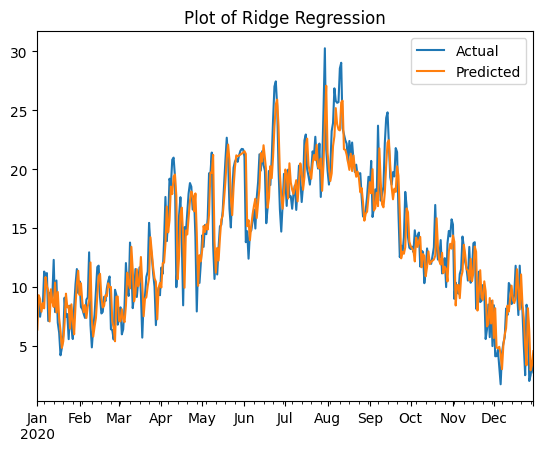

In [ ]:
combined_data.plot(title = "Plot of Ridge Regression")

In [ ]:
reg.coef_

array([ 5.54211394e-01, -1.00100970e-01, -9.48330845e-02,  3.66312988e-01,
       -1.13418418e-02, -5.92525069e-01, -2.07304349e-02, -1.24127517e-01,
       -1.17638670e-04, -3.50613539e-01,  8.65117710e-02,  3.67791803e-01])

In [ ]:
Weather_data["month_max"] = Weather_data["Temp_Max"].rolling(30).mean()

Weather_data["month_day_max"] = Weather_data["month_max"] / Weather_data["Temp_Max"]

Weather_data["max_min"] = Weather_data["Temp_Max"] / Weather_data["Temp_Min"]

In [ ]:
Weather_data = Weather_data.iloc[30:,:].copy()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def create_predictions(predictors, core_weather, reg):
    Train_data = Weather_data.loc[:"2019-12-30"]
    Test_data = Weather_data.loc["2020-01-01":]

    reg.fit(Train_data[predictors], Train_data["target"])
    predictions = reg.predict(Test_data[predictors])

    error = mean_squared_error(Test_data["target"], predictions)

    combined = pd.concat([Test_data["target"], pd.Series(predictions, index=Test_data.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [ ]:
predictors = ["Temp_Max","Temp_Min","Skin_Temp",	"Temp_2Meter",	"Percipitation",	"Specific_Humiduty",	"Relative_Humidity",	"Wind_Speed",	"Wind_Direction", "Sky_Shortwave_Downward",	"Sky_Par_Total","Frost_point"]

error, combined = create_predictions(predictors, Weather_data, reg)
error

5.127513297770289

<Axes: >

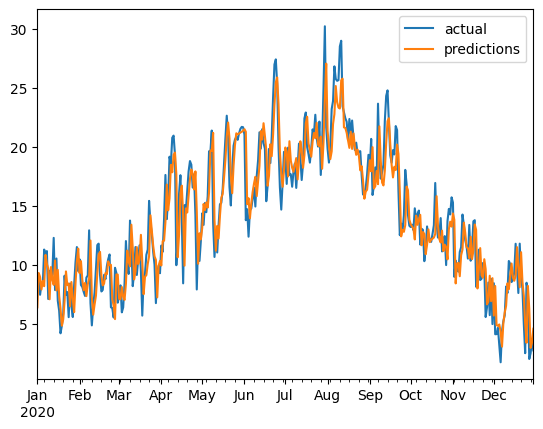

In [ ]:
combined.plot()

In [ ]:
# Ensure Weather_data index is a datetime index
Weather_data.index = pd.to_datetime(Weather_data.index)

In [ ]:
# Calculate the expanding mean of 'Temp_Max' grouped by day of the year
Weather_data['monthly_avg'] = Weather_data.groupby(Weather_data.index.month)['Temp_Max'].transform(lambda x: x.expanding().mean())
Weather_data['day_of_year_avg'] = Weather_data.groupby(Weather_data.index.day_of_year)['Temp_Max'].transform(lambda x: x.expanding().mean())

In [ ]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], Weather_data, reg)
error

4.899198150584591

In [ ]:
reg.coef_

array([ 4.86434784e-01, -1.48562589e-01, -2.98394654e-01,  1.12413898e+00,
       -3.47324403e-02, -6.68117150e-01,  1.03600918e-01, -9.71865806e-02,
       -1.69044323e-04, -2.47162065e-01,  5.90825191e-02, -1.56447378e-01,
        1.73307660e-01,  3.35198332e-02])

In [ ]:
Weather_data.corr()["target"]

Temp_Max                  0.931585
Temp_Min                  0.829308
Skin_Temp                 0.920164
Temp_2Meter               0.915695
Percipitation            -0.070814
Specific_Humiduty         0.836371
Relative_Humidity        -0.640106
Wind_Speed               -0.119639
Wind_Direction            0.015122
Sky_Shortwave_Downward    0.744227
Sky_Par_Total             0.758283
Frost_point               0.849800
target                    1.000000
month_max                 0.848997
month_day_max            -0.101706
max_min                  -0.005348
monthly_avg               0.860755
day_of_year_avg           0.889426
Name: target, dtype: float64

In [ ]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [ ]:
combined.sort_values("diff", ascending=False).head(10)

actual  predictions      diff
2020-06-02   13.80    21.350033  7.550033
2020-04-12    9.98    17.328956  7.348956
2020-05-09   13.59    20.704596  7.114596
2020-09-07   23.69    17.463565  6.226435
2020-04-27    7.92    14.115374  6.195374
2020-07-30   30.26    24.074501  6.185499
2020-04-17    8.44    13.967532  5.527532
2020-08-10   28.55    23.213703  5.336297
2020-07-31   21.69    26.929867  5.239867
2020-04-18   15.08    10.179291  4.900709

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Test_data['target'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error
mse = mean_squared_error(Test_data['target'], predictions)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared
r2 = r2_score(Test_data['target'], predictions)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.7551335210410568
Mean Squared Error (MSE): 5.12747543412224
Root Mean Squared Error (RMSE): 2.264392950466469
R-squared (R2): 0.8442364571949234


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Define the function to create predictions using ANN
def create_ann_predictions(predictor_vars, weather_data):
    # Ensure the date range is correct and data exists
    if weather_data.index.min() > pd.Timestamp("2019-12-30") or weather_data.index.max() < pd.Timestamp("2020-01-01"):
        raise ValueError("The dataset does not contain the specified date range for training and testing.")

    # Split the data into training and testing sets
    train_data = weather_data.loc[:"2019-12-30"]
    test_data = weather_data.loc["2020-01-01":]

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(train_data[predictor_vars])
    X_test_scaled = scaler.transform(test_data[predictor_vars])
    y_train = train_data["Temp_Max"].values
    y_test = test_data["Temp_Max"].values

    # Build the ANN model
    ann_model = Sequential()
    ann_model.add(Dense(64, activation='relu', input_dim=len(predictor_vars)))
    ann_model.add(Dense(32, activation='relu'))
    ann_model.add(Dense(1))
    ann_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model and capture the history
    history = ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

    # Make predictions on the test data
    test_predictions = ann_model.predict(X_test_scaled)

    # Calculate the mean squared error
    mse_error = mean_squared_error(y_test, test_predictions)

    # Combine actual and predicted values into a DataFrame
    results_combined = pd.DataFrame({
        'actual': y_test,
        'predicted': test_predictions.flatten()
    }, index=test_data.index)

    # Calculate the absolute difference
    results_combined["absolute_diff"] = (results_combined["actual"] - results_combined["predicted"]).abs()

    return mse_error, results_combined, history


In [ ]:
# Define your predictors
predictor_variables = ["Temp_Min", "Skin_Temp", "Temp_2Meter", "Percipitation",
                       "Specific_Humiduty", "Relative_Humidity", "Wind_Speed",
                       "Wind_Direction", "Sky_Shortwave_Downward", "Sky_Par_Total", "Frost_point"]

# Call the function to create predictions
error, combined_results, training_history = create_ann_predictions(predictor_variables, Weather_data)


Epoch 1/50
290/290 [==============================] - 2s 4ms/step - loss: 56.3170 - val_loss: 10.2222
Epoch 2/50
290/290 [==============================] - 1s 2ms/step - loss: 5.9984 - val_loss: 4.4949
Epoch 3/50
290/290 [==============================] - 1s 2ms/step - loss: 2.8510 - val_loss: 2.1885
Epoch 4/50
290/290 [==============================] - 1s 2ms/step - loss: 1.4185 - val_loss: 1.2045
Epoch 5/50
290/290 [==============================] - 1s 2ms/step - loss: 0.9354 - val_loss: 0.9179
Epoch 6/50
290/290 [==============================] - 1s 2ms/step - loss: 0.7679 - val_loss: 0.8229
Epoch 7/50
290/290 [==============================] - 1s 2ms/step - loss: 0.7219 - val_loss: 0.9178
Epoch 8/50
290/290 [==============================] - 1s 2ms/step - loss: 0.6854 - val_loss: 0.7864
Epoch 9/50
290/290 [==============================] - 1s 2ms/step - loss: 0.6521 - val_loss: 0.8808
Epoch 10/50
290/290 [==============================] - 1s 2ms/step - loss: 0.6403 - val_loss: 0.72

In [ ]:
# Calculate metrics
mae = mean_absolute_error(Test_data['target'], combined_results['predicted'])
mse = mean_squared_error(Test_data['target'], combined_results['predicted'])
rmse = mse ** 0.5
r2 = r2_score(Test_data['target'], combined_results['predicted'])

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1.9506920424683454
Mean Squared Error (MSE): 6.19408115788518
Root Mean Squared Error (RMSE): 2.4887911037058092
R-squared (R2): 0.8118348809330705


In [ ]:
# Print the top 10 largest differences
print("Top 10 largest differences:")
print(combined_results.sort_values("absolute_diff", ascending=False).head(10))


Top 10 largest differences:
            actual  predicted  absolute_diff
2020-07-31   30.26  26.969421       3.290579
2020-03-24   15.44  12.709483       2.730517
2020-09-28   18.07  15.412031       2.657969
2020-03-18    9.48  11.899884       2.419884
2020-03-15    9.15  11.539605       2.389605
2020-06-11   17.56  15.246739       2.313261
2020-07-27   22.17  19.892900       2.277100
2020-06-03   13.80  16.072468       2.272468
2020-12-22    9.01   6.772379       2.237621
2020-10-27   12.45  10.256363       2.193637


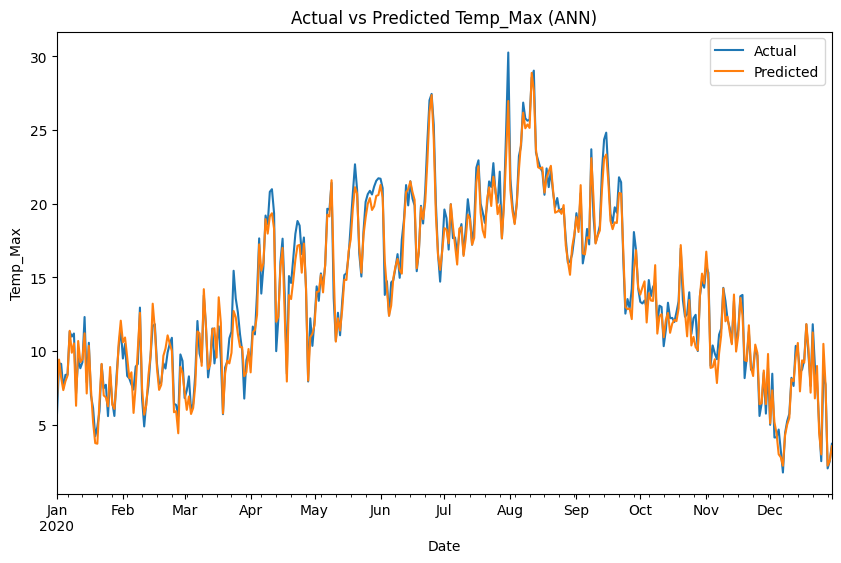

In [ ]:
# Plot the actual vs. predicted values
fig, ax = plt.subplots(figsize=(10, 6))
combined_results[["actual", "predicted"]].plot(ax=ax)
plt.title('Actual vs Predicted Temp_Max (ANN)')
plt.xlabel('Date')
plt.ylabel('Temp_Max')
plt.legend(['Actual', 'Predicted'])
plt.show()

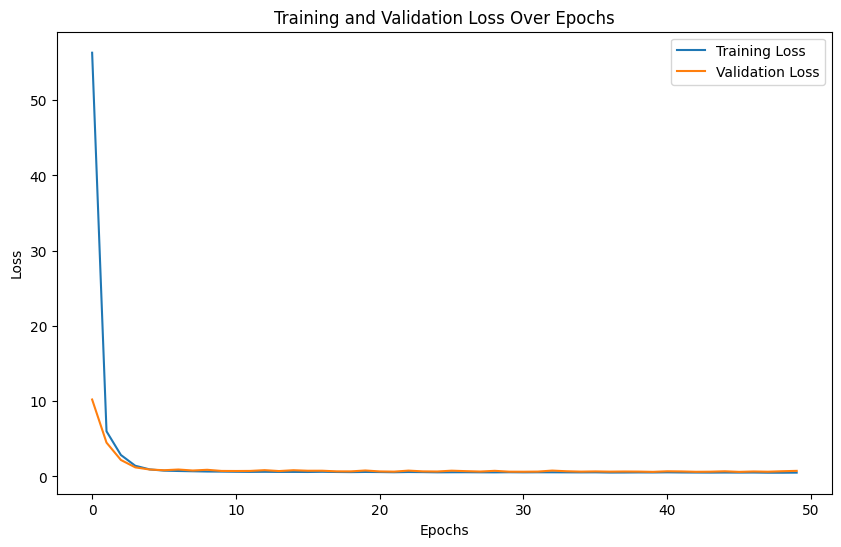

In [ ]:
# Plot the training and validation loss
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(training_history.history['loss'], label='Training Loss')
ax.plot(training_history.history['val_loss'], label='Validation Loss')
ax.set_title('Training and Validation Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [ ]:
# Define the function to create predictions using LSTM
def create_lstm_predictions(predictor_vars, weather_data):
    # Ensure the date range is correct and data exists
    if weather_data.index.min() > pd.Timestamp("2019-12-30") or weather_data.index.max() < pd.Timestamp("2020-01-01"):
        raise ValueError("The dataset does not contain the specified date range for training and testing.")

    # Split the data into training and testing sets
    train_data = weather_data.loc[:"2019-12-30"]
    test_data = weather_data.loc["2020-01-01":]

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(train_data[predictor_vars])
    X_test_scaled = scaler.transform(test_data[predictor_vars])
    y_train = train_data["Temp_Max"].values
    y_test = test_data["Temp_Max"].values

    # Reshape the data for LSTM [samples, time steps, features]
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Build the LSTM model
    lstm_model = Sequential()
    lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    lstm_model.add(Dense(1))
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model and capture the history
    lstm_history = lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

    # Make predictions on the test data
    test_predictions_lstm = lstm_model.predict(X_test_reshaped)

    # Calculate the mean squared error
    mse_error_lstm = mean_squared_error(y_test, test_predictions_lstm)

    # Combine actual and predicted values into a DataFrame
    results_combined_lstm = pd.DataFrame({
        'actual': y_test,
        'predicted': test_predictions_lstm.flatten()
    }, index=test_data.index)

    # Calculate the absolute difference
    results_combined_lstm["absolute_diff"] = (results_combined_lstm["actual"] - results_combined_lstm["predicted"]).abs()

    return mse_error_lstm, results_combined_lstm, lstm_history

In [ ]:
# Define your predictors
lstm_predictor_variables = ["Temp_Min", "Skin_Temp", "Temp_2Meter", "Percipitation",
                            "Specific_Humiduty", "Relative_Humidity", "Wind_Speed",
                            "Wind_Direction", "Sky_Shortwave_Downward", "Sky_Par_Total", "Frost_point"]

# Call the function to create predictions
error_lstm, combined_results_lstm, training_history_lstm = create_lstm_predictions(lstm_predictor_variables, Weather_data)

# Print the error
print(f"Mean Squared Error (LSTM): {error_lstm}")


Epoch 1/50
290/290 [==============================] - 4s 7ms/step - loss: 123.8308 - val_loss: 54.5287
Epoch 2/50
290/290 [==============================] - 2s 5ms/step - loss: 42.8627 - val_loss: 32.0953
Epoch 3/50
290/290 [==============================] - 2s 8ms/step - loss: 21.2524 - val_loss: 13.2437
Epoch 4/50
290/290 [==============================] - 2s 7ms/step - loss: 8.0147 - val_loss: 5.9210
Epoch 5/50
290/290 [==============================] - 2s 8ms/step - loss: 4.1218 - val_loss: 3.7504
Epoch 6/50
290/290 [==============================] - 2s 6ms/step - loss: 2.7967 - val_loss: 2.6994
Epoch 7/50
290/290 [==============================] - 2s 6ms/step - loss: 2.0390 - val_loss: 2.0378
Epoch 8/50
290/290 [==============================] - 2s 7ms/step - loss: 1.5460 - val_loss: 1.6277
Epoch 9/50
290/290 [==============================] - 2s 7ms/step - loss: 1.2300 - val_loss: 1.3631
Epoch 10/50
290/290 [==============================] - 2s 6ms/step - loss: 1.0182 - val_loss:

In [ ]:
# Calculate metrics
mae_lstm = mean_absolute_error(Test_data['target'], combined_results_lstm['predicted'])
mse_lstm = mean_squared_error(Test_data['target'], combined_results_lstm['predicted'])
rmse_lstm = mse ** 0.5
r2_lstm = r2_score(Test_data['target'], combined_results_lstm['predicted'])

# Print metrics
print(f"Mean Absolute Error (MAE): {mae_lstm}")
print(f"Mean Squared Error (MSE): {mse_lstm}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"R-squared (R2): {r2_lstm}")

Mean Absolute Error (MAE): 1.905622968334041
Mean Squared Error (MSE): 6.0547542488709905
Root Mean Squared Error (RMSE): 2.4887911037058092
R-squared (R2): 0.816067383503772


In [ ]:
# Print the top 10 largest differences
print("Top 10 largest differences (LSTM):")
print(combined_results_lstm.sort_values("absolute_diff", ascending=False).head(10))

Top 10 largest differences (LSTM):
            actual  predicted  absolute_diff
2020-03-17   11.67  13.992426       2.322426
2020-03-15    9.15  11.387586       2.237586
2020-07-31   30.26  28.096489       2.163511
2020-06-03   13.80  15.896669       2.096669
2020-10-27   12.45  10.367459       2.082541
2020-06-11   17.56  15.531220       2.028780
2020-03-18    9.48  11.461411       1.981411
2020-12-26    8.49  10.445879       1.955879
2020-04-13    9.98  11.886662       1.906662
2020-07-27   22.17  20.306103       1.863897


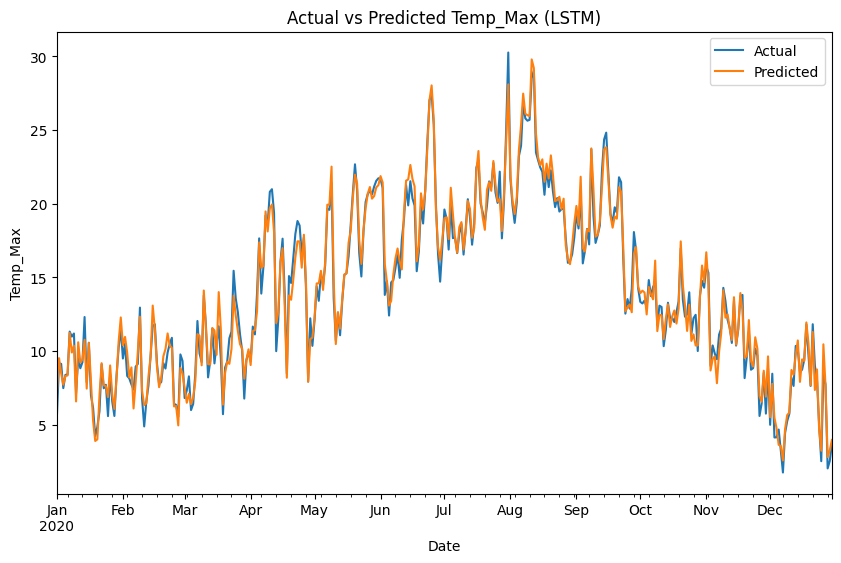

In [ ]:
# Plot the actual vs. predicted values
fig, ax = plt.subplots(figsize=(10, 6))
combined_results_lstm[["actual", "predicted"]].plot(ax=ax)
plt.title('Actual vs Predicted Temp_Max (LSTM)')
plt.xlabel('Date')
plt.ylabel('Temp_Max')
plt.legend(['Actual', 'Predicted'])
plt.show()

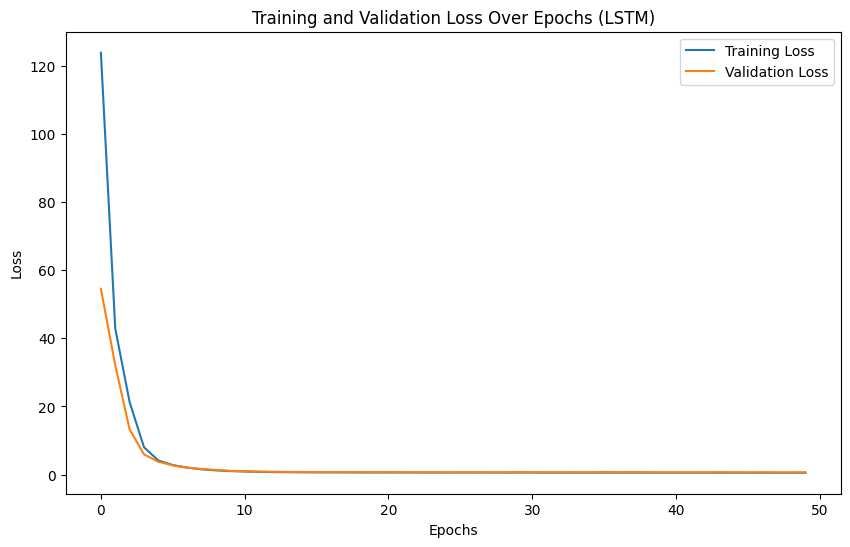

In [ ]:
# Plot the training and validation loss
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(training_history_lstm.history['loss'], label='Training Loss')
ax.plot(training_history_lstm.history['val_loss'], label='Validation Loss')
ax.set_title('Training and Validation Loss Over Epochs (LSTM)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
def create_gbm_predictions(weather_data, predictors):
    # Split the data into training and testing sets
    train_data = weather_data.loc[:"2019-12-30"]
    test_data = weather_data.loc["2020-01-01":]

    # Define and train the Gradient Boosting Regressor
    gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
    gbm_model.fit(train_data[predictors], train_data['Temp_Max'])

    # Make predictions on the test data
    test_predictions_gbm = gbm_model.predict(test_data[predictors])

    # Calculate the mean squared error
    mse_error_gbm = mean_squared_error(test_data['Temp_Max'], test_predictions_gbm)

    # Combine actual and predicted values into a DataFrame
    results_combined_gbm = pd.DataFrame({
        'actual': test_data['Temp_Max'],
        'predicted': test_predictions_gbm
    }, index=test_data.index)

    # Calculate the absolute difference
    results_combined_gbm["absolute_diff"] = (results_combined_gbm["actual"] - results_combined_gbm["predicted"]).abs()

    return mse_error_gbm, results_combined_gbm

In [ ]:
# Call the function to create predictions
error_gbm, combined_results_gbm = create_gbm_predictions(Weather_data, predictors)

In [ ]:
# Calculate metrics
mae_gbm = mean_absolute_error(Test_data['target'], combined_results_gbm['predicted'])
mse_gbm = mean_squared_error(Test_data['target'], combined_results_gbm['predicted'])
rmse_gbm = mse ** 0.5
r2_gbm = r2_score(Test_data['target'], combined_results_gbm['predicted'])

# Print metrics
print(f"Mean Absolute Error (MAE): {mae_gbm}")
print(f"Mean Squared Error (MSE): {mse_gbm}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbm}")
print(f"R-squared (R2): {r2_gbm}")

Mean Absolute Error (MAE): 1.8771784117877528
Mean Squared Error (MSE): 5.909105839127451
Root Mean Squared Error (RMSE): 2.4887911037058092
R-squared (R2): 0.8204919219724702


In [ ]:
# Print the top 10 largest differences
print("Top 10 largest differences (Gradient Boosting):")

combined.sort_values("diff", ascending=False).head(10)
print(combined_results_gbm.sort_values("absolute_diff", ascending=False).head(10))

Top 10 largest differences (Gradient Boosting):
            actual  predicted  absolute_diff
2020-08-11   28.55  29.411673       0.861673
2020-08-12   29.03  29.688146       0.658146
2020-07-31   30.26  29.687463       0.572537
2020-08-20   22.26  22.115748       0.144252
2020-05-31   21.72  21.578992       0.141008
2020-06-23   24.22  24.087895       0.132105
2020-07-02   19.01  18.879158       0.130842
2020-12-08    4.42   4.289886       0.130114
2020-08-10   25.69  25.819874       0.129874
2020-04-28    7.92   7.790281       0.129719


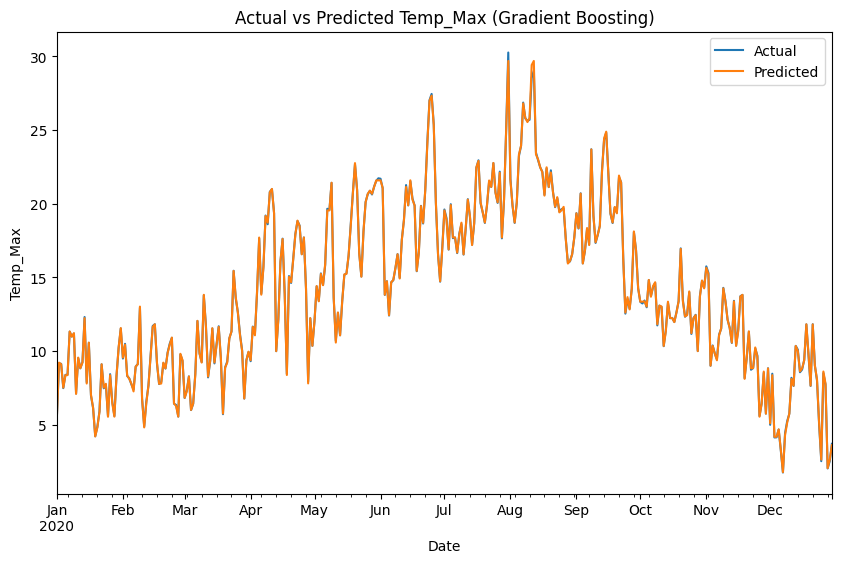

In [ ]:
# Plot the actual vs. predicted values
fig, ax = plt.subplots(figsize=(10, 6))
combined_results_gbm[["actual", "predicted"]].plot(ax=ax)
plt.title('Actual vs Predicted Temp_Max (Gradient Boosting)')
plt.xlabel('Date')
plt.ylabel('Temp_Max')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def create_rf_predictions(weather_data, predictors):
    # Split the data into training and testing sets
    train_data = weather_data.loc[:"2019-12-30"]
    test_data = weather_data.loc["2020-01-01":]

    # Define and train the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
    rf_model.fit(train_data[predictors], train_data['Temp_Max'])

    # Make predictions on the test data
    test_predictions_rf = rf_model.predict(test_data[predictors])

    # Calculate the mean squared error
    mse_error_rf = mean_squared_error(test_data['Temp_Max'], test_predictions_rf)

    # Combine actual and predicted values into a DataFrame
    results_combined_rf = pd.DataFrame({
        'actual': test_data['Temp_Max'],
        'predicted': test_predictions_rf
    }, index=test_data.index)

    # Calculate the absolute difference
    results_combined_rf["absolute_diff"] = (results_combined_rf["actual"] - results_combined_rf["predicted"]).abs()

    return mse_error_rf, results_combined_rf

In [ ]:
# Define predictors
predictors = ['Temp_Max', 'Temp_Min', 'Skin_Temp', 'Temp_2Meter', 'Percipitation', 'Specific_Humiduty',
               'Relative_Humidity', 'Wind_Speed', 'Wind_Direction', 'Sky_Shortwave_Downward',
               'Sky_Par_Total', 'Frost_point']

# Call the function to create predictions
error_rf, combined_results_rf = create_rf_predictions(Weather_data, predictors)


In [ ]:
# Calculate metrics
mae_rf = mean_absolute_error(Test_data['target'], combined_results_rf['predicted'])
mse_rf = mean_squared_error(Test_data['target'], combined_results_rf['predicted'])
rmse_rf = mse ** 0.5
r2_rf = r2_score(Test_data['target'], combined_results_rf['predicted'])

# Print metrics
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared (R2): {r2_rf}")

Mean Absolute Error (MAE): 1.8723071232876694
Mean Squared Error (MSE): 5.87324882906849
Root Mean Squared Error (RMSE): 2.4887911037058092
R-squared (R2): 0.8215811938749766


In [ ]:
# Print the top 10 largest differences
print("Top 10 largest differences (Random Forest):")
print(combined_results_rf.sort_values("absolute_diff", ascending=False).head(10))

Top 10 largest differences (Random Forest):
            actual  predicted  absolute_diff
2020-07-31   30.26    29.2938         0.9662
2020-08-11   28.55    29.2594         0.7094
2020-08-12   29.03    29.4584         0.4284
2020-06-25   27.45    27.1787         0.2713
2020-06-24   27.02    26.9667         0.0533
2020-09-15   24.82    24.8626         0.0426
2020-09-14   24.35    24.3860         0.0360
2020-06-23   24.22    24.1849         0.0351
2020-08-10   25.69    25.7175         0.0275
2020-08-05   23.23    23.2070         0.0230


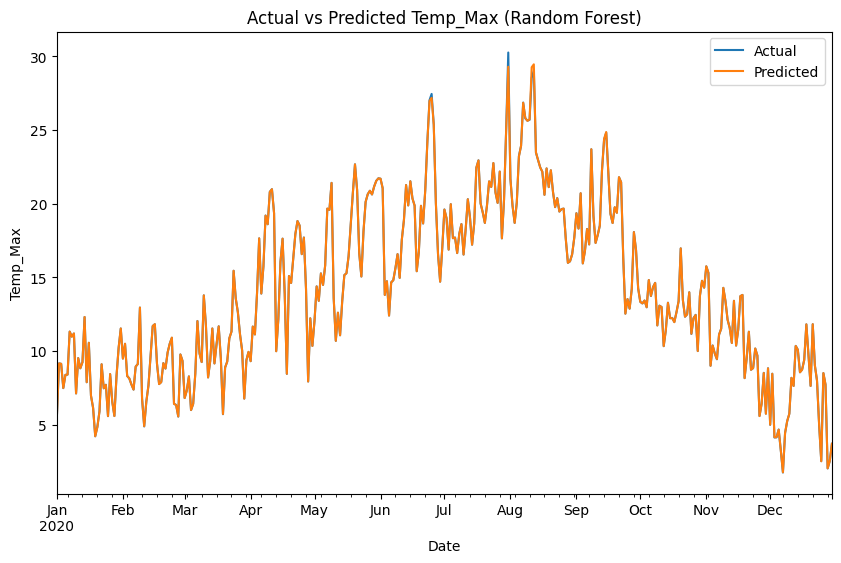

In [ ]:
# Plot the actual vs. predicted values
fig, ax = plt.subplots(figsize=(10, 6))
combined_results_rf[["actual", "predicted"]].plot(ax=ax)
plt.title('Actual vs Predicted Temp_Max (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Temp_Max')
plt.legend(['Actual', 'Predicted'])
plt.show()
